In [234]:
!pip install pyspark

In [235]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test

In [236]:
from pyspark.sql.session import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()

In [270]:
dataset = spark.read.csv("/content/drive/MyDrive/EDA_car_sales_data/car_sales_data.csv", header=True, inferSchema=True)
dataset.show()

+----------+-----------------+--------------+-----------+--------+-------------------------+------------+----------+-----------+-------------+----------+---------------+-----------------+---------------+
|      Date|      Salesperson|      Customer|   Car Make|Car Year|Original manufacture sale|Car Tax rate|Gov Income|Profit Rate|Profit Income|Sale Price|Commission Rate|Commission Earned|Company Revenue|
+----------+-----------------+--------------+-----------+--------+-------------------------+------------+----------+-----------+-------------+----------+---------------+-----------------+---------------+
| 4/28/2009|    Jessica Brown|Customer_65768|       Ford|    2018|                64831.872|        0.15| 9724.7808|       0.25|   18639.1632|  93195.82|           0.12|      11183.49792|    17180.45008|
| 9/11/2009|      Karen Green|Customer_65779|       Ford|    2022|                 26817.12|        0.15|  4022.568|       0.25|     7709.922|  38549.61|            0.1|         3854.9

# Find The Uniques Customers

In [238]:
from pyspark.sql import functions as F

# Count the number of unique customers
unique_customers_count = dataset.select(F.countDistinct("Customer").alias("Unique Customers"))

# Show the result
unique_customers_count.show()


+----------------+
|Unique Customers|
+----------------+
|           12375|
+----------------+



# Find Min, Max and Average of Commission Rate

In [239]:
from pyspark.sql import functions as F

# Calculate the minimum and maximum Commission Rate
min_max_commission_rates = dataset.select(
    F.min("Commission Rate").alias("Min Commission Rate"),
    F.max("Commission Rate").alias("Max Commission Rate")
)

# Show the result
min_max_commission_rates.show()


+-------------------+-------------------+
|Min Commission Rate|Max Commission Rate|
+-------------------+-------------------+
|               0.01|               0.15|
+-------------------+-------------------+



In [240]:
from pyspark.sql import functions as F

# Calculate the average Commission Rate
average_commission_rate = dataset.select(
    F.avg("Commission Rate").alias("Average Commission Rate")
)

# Show the result
average_commission_rate.show()


+-----------------------+
|Average Commission Rate|
+-----------------------+
|    0.08025212121211894|
+-----------------------+



# Find Car Make with Highest and Lowerest price

In [241]:
from pyspark.sql import functions as F

# Group by Car Make and calculate the highest and lowest sale prices
highest_lowest_prices = dataset.groupBy("Car Make").agg(
    F.max("Sale Price").alias("Highest Price"),
    F.min("Sale Price").alias("Lowest Price")
)

# Show the result
highest_lowest_prices.show()


+-----------+-------------+------------+
|   Car Make|Highest Price|Lowest Price|
+-----------+-------------+------------+
|  Chevrolet|     49023.86|     17595.0|
|      Honda|     49077.98|     17664.5|
|Lamborghini|    782123.19|    90231.02|
|   Mercedes|    792033.02|    90828.35|
|      Tesla|      98894.9|    35150.76|
|        BMW|     98235.52|    35073.23|
|     Toyota|     49339.83|    17824.61|
|     Nissan|     49555.07|    17487.83|
|      Mazda|     49151.37|    17730.01|
|       Ford|     97592.57|    35019.23|
+-----------+-------------+------------+



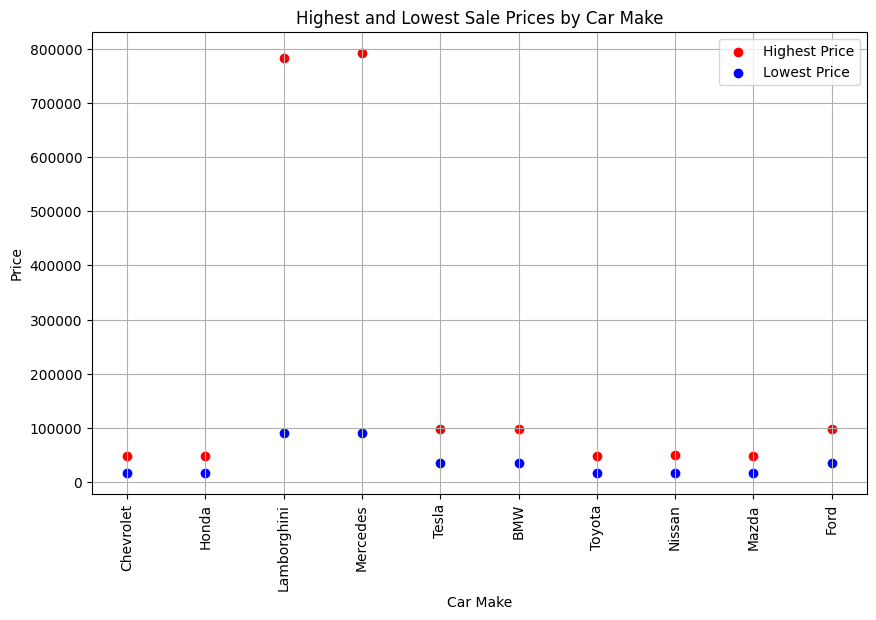

In [242]:
import matplotlib.pyplot as plt

# Extracting data for plotting
car_makes = highest_lowest_prices.select("Car Make").rdd.flatMap(lambda x: x).collect()
highest_prices = highest_lowest_prices.select("Highest Price").rdd.flatMap(lambda x: x).collect()
lowest_prices = highest_lowest_prices.select("Lowest Price").rdd.flatMap(lambda x: x).collect()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(car_makes, highest_prices, color='red', label='Highest Price')
plt.scatter(car_makes, lowest_prices, color='blue', label='Lowest Price')
plt.xlabel('Car Make')
plt.ylabel('Price')
plt.title('Highest and Lowest Sale Prices by Car Make')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


# Find the total sales vs number of car for each car make

In [243]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Group by Car Make and calculate sum of Sale Price and count of Car Make
total_sales_by_car_make = dataset.groupBy("Car Make").agg(
    F.sum("Sale Price").alias("Total Sales"),
    F.count("Car Make").alias("Number of Cars")
)

# Show the result
total_sales_by_car_make.show()


+-----------+--------------------+--------------+
|   Car Make|         Total Sales|Number of Cars|
+-----------+--------------------+--------------+
|  Chevrolet| 4.089744129000006E7|          1262|
|      Honda| 7.108201355999997E7|          2193|
|Lamborghini|1.3405584891000006E8|           311|
|   Mercedes|1.2431499985000005E8|           296|
|      Tesla| 7.789882211999995E7|          1202|
|        BMW| 7.722152031999989E7|          1192|
|     Toyota| 7.236706276999988E7|          2208|
|     Nissan| 5.090838702999996E7|          1555|
|      Mazda| 4.084904686000004E7|          1258|
|       Ford|        5.87528153E7|           898|
+-----------+--------------------+--------------+



# Find Total sales Vs Car Make

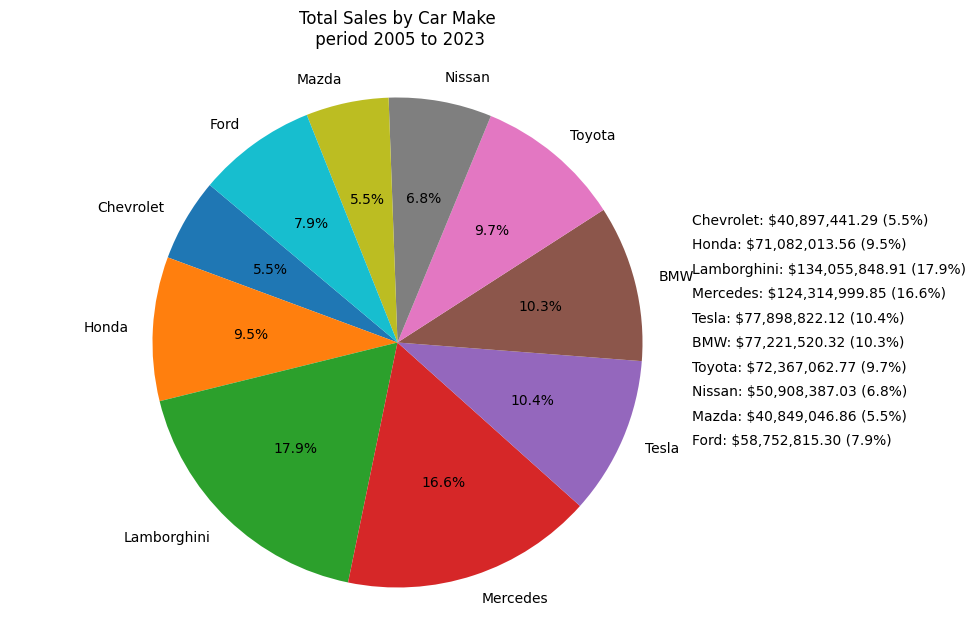

In [244]:
# Plotting the pie chart with values
plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(total_sales_by_car_make_pandas["Total Sales"], labels=total_sales_by_car_make_pandas["Car Make"], autopct='%1.1f%%', startangle=140)

# Adding values to the pie chart outside
total_sales = total_sales_by_car_make_pandas["Total Sales"]
car_makes = total_sales_by_car_make_pandas["Car Make"]
for i, (car_make, sales) in enumerate(zip(car_makes, total_sales)):
    plt.text(1.2, 0.5 - i*0.1, f'{car_make}: ${sales:,.2f} ({autotexts[i].get_text()})', horizontalalignment='left', verticalalignment='center', fontsize=10, color='black')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Total Sales by Car Make\n period 2005 to 2023\n')
plt.show()


# Find Number of Sales vs Car Make

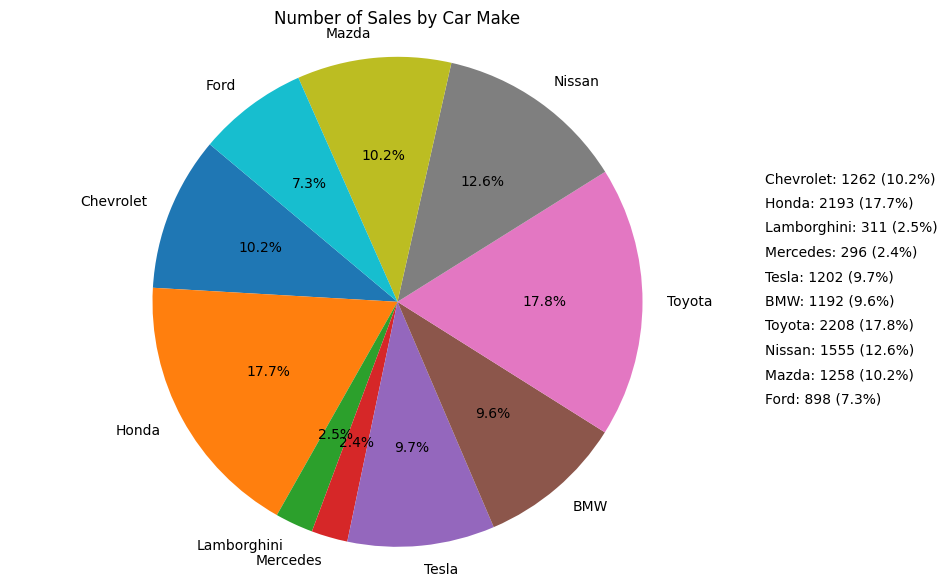

In [247]:
# Plotting the pie chart with values
# Assuming you have already grouped and aggregated the sales data by car make
sales_count_by_car_make = dataset.groupBy("Car Make").count()

# Convert the PySpark DataFrame to a Pandas DataFrame for easier manipulation and plotting
sales_count_by_car_make_pandas = sales_count_by_car_make.toPandas()

plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(sales_count_by_car_make_pandas["count"], labels=sales_count_by_car_make_pandas["Car Make"], autopct='%1.1f%%', startangle=140)

# Adding values to the pie chart outside
for i, (car_make, count) in enumerate(zip(sales_count_by_car_make_pandas["Car Make"], sales_count_by_car_make_pandas["count"])):
    plt.text(1.5, 0.5 - i*0.1, f'{car_make}: {count} ({autotexts[i].get_text()})', horizontalalignment='left', verticalalignment='center', fontsize=10, color='black')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Sales by Car Make')
plt.show()



# Find number of sales for each car

In [248]:
# Group by Car Make and count the number of sales
sales_count_by_car_make = dataset.groupBy("Car Make").count()

# Show the result
sales_count_by_car_make.show()


+-----------+-----+
|   Car Make|count|
+-----------+-----+
|  Chevrolet| 1262|
|      Honda| 2193|
|Lamborghini|  311|
|   Mercedes|  296|
|      Tesla| 1202|
|        BMW| 1192|
|     Toyota| 2208|
|     Nissan| 1555|
|      Mazda| 1258|
|       Ford|  898|
+-----------+-----+



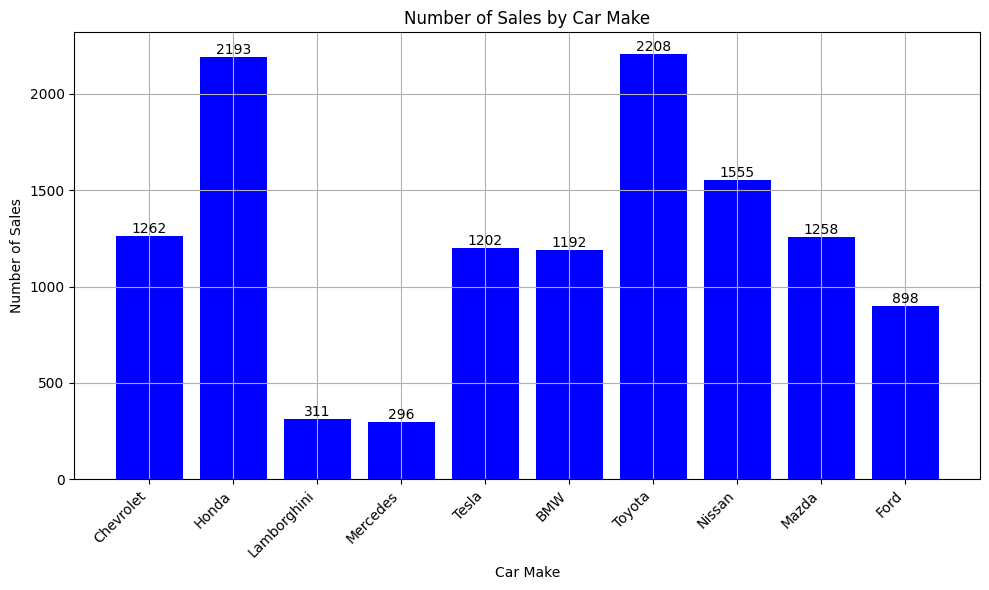

In [249]:
import matplotlib.pyplot as plt

# Assuming sales_count_by_car_make is computed using PySpark DataFrame

# Convert to Pandas DataFrame for plotting
sales_count_by_car_make_pandas = sales_count_by_car_make.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_count_by_car_make_pandas["Car Make"], sales_count_by_car_make_pandas["count"], color='blue')
plt.xlabel('Car Make')
plt.ylabel('Number of Sales')
plt.title('Number of Sales by Car Make')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Adding labels for each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', color='black', fontsize=10)

plt.show()


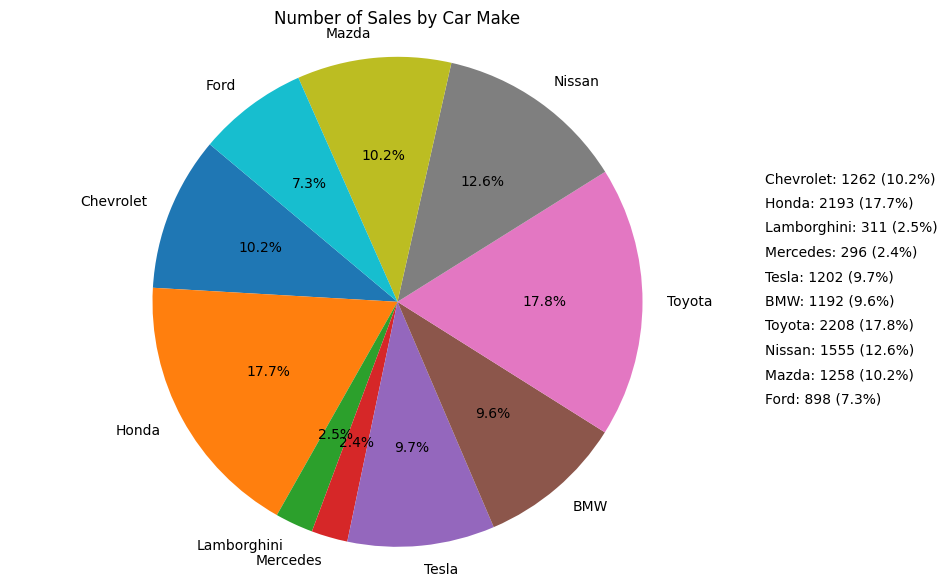

In [250]:
# Plotting the pie chart with values
plt.figure(figsize=(10, 7))
patches, texts, autotexts = plt.pie(sales_count_by_car_make_pandas["count"], labels=sales_count_by_car_make_pandas["Car Make"], autopct='%1.1f%%', startangle=140)

# Adding values to the pie chart outside
for i, (car_make, count) in enumerate(zip(sales_count_by_car_make_pandas["Car Make"], sales_count_by_car_make_pandas["count"])):
    plt.text(1.5, 0.5 - i*0.1, f'{car_make}: {count} ({autotexts[i].get_text()})', horizontalalignment='left', verticalalignment='center', fontsize=10, color='black')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of Sales by Car Make')
plt.show()


In [277]:
from pyspark.sql import functions as F

# Step 1: Group by Car Year and count the number of cars for each year
car_count_by_year = dataset.groupBy(F.year(F.to_date(dataset["Date"], "M/d/yyyy")).alias("Year")).count().orderBy("Year")

# Step 2: Group by Car Year and calculate the total sales for each year
sales_by_year = dataset.groupBy(F.year(F.to_date(dataset["Date"], "M/d/yyyy")).alias("Year")).agg(F.count("Car Make").alias("Number of Cars"))

# Step 3: Merge the two datasets on "Car Year"
merged_data = car_count_by_year.join(sales_by_year, "Year")


# Find the average of car by year


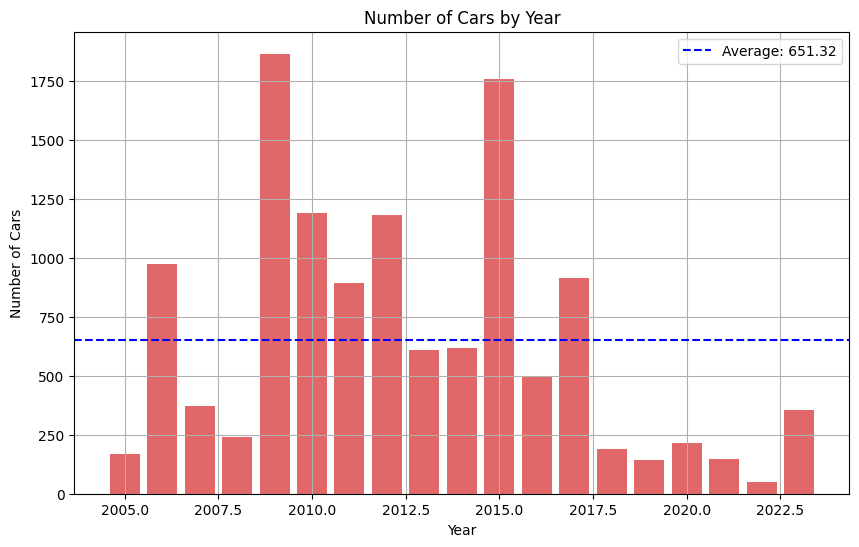

In [278]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Assuming the dataset is already grouped and aggregated as 'sales_by_year'
sales_by_year = dataset.groupBy(F.year(F.to_date("Date", "M/d/yyyy")).alias("Year")).agg(F.count("Car Make").alias("Number of Cars"))

# Extracting data for plotting
years = [row["Year"] for row in sales_by_year.collect()]
car_counts = [row["Number of Cars"] for row in sales_by_year.collect()]

# Calculating the average number of cars sold per year
average_cars_per_year = sum(car_counts) / len(car_counts)

# Plotting the number of cars for each year using a column plot
plt.figure(figsize=(10, 6))
plt.bar(years, car_counts, color='tab:red', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Year')

# Adding the average label to the plot
plt.axhline(average_cars_per_year, color='blue', linestyle='--', label=f'Average: {average_cars_per_year:.2f}')
plt.legend()

plt.grid(True)
plt.show()


# Find deep dive of salesperson

In [253]:
from pyspark.sql import functions as F

# Group by Salesperson and count the number of cars sold by each salesperson
salesperson_car_count = dataset.groupBy("Salesperson").count()

# Find the salesperson who sold the most cars
most_cars_sold = salesperson_car_count.orderBy(F.col("count").desc()).first()

# Extract the salesperson name and the number of cars sold
most_cars_sold_salesperson = most_cars_sold["Salesperson"]
most_cars_sold_count = most_cars_sold["count"]

print(f"The salesperson who sold the most cars is {most_cars_sold_salesperson} with {most_cars_sold_count} cars sold.")


The salesperson who sold the most cars is David Williams with 455 cars sold.


In [254]:
from pyspark.sql import functions as F

# Group by Salesperson and sum the commission earned by each salesperson
salesperson_commission = dataset.groupBy("Salesperson").agg(F.sum("Commission Earned").alias("Total Commission"))

# Find the salesperson who earned the highest commission
highest_commission_earner = salesperson_commission.orderBy(F.col("Total Commission").desc()).first()

# Extract the salesperson name and the total commission earned
highest_commission_earner_name = highest_commission_earner["Salesperson"]
highest_commission_earned = highest_commission_earner["Total Commission"]

print(f"The salesperson who earned the highest commission is {highest_commission_earner_name} with a total commission of {highest_commission_earned}.")


The salesperson who earned the highest commission is Michael Jones with a total commission of 2482300.6837399993.


In [255]:
from pyspark.sql import functions as F

# Group by Salesperson and sum the company revenue generated by each salesperson
salesperson_revenue = dataset.groupBy("Salesperson").agg(F.sum("Company Revenue").alias("Total Revenue"))

# Find the salesperson who generated the highest company revenue
highest_revenue_earner = salesperson_revenue.orderBy(F.col("Total Revenue").desc()).first()

# Extract the salesperson name and the total revenue generated
highest_revenue_earner_name = highest_revenue_earner["Salesperson"]
highest_revenue_generated = highest_revenue_earner["Total Revenue"]

print(f"The salesperson who generated the highest company revenue is {highest_revenue_earner_name} with a total revenue of {highest_revenue_generated}.")


The salesperson who generated the highest company revenue is John Smith with a total revenue of 6450990.674729005.


# Find Salesperson vs Total car

In [256]:
# Grouping the dataset by Salesperson and calculating the total number of cars sold by each salesperson
total_cars_by_salesperson = dataset.groupBy("Salesperson").agg(F.count("Car Make").alias("Total Cars"))

# Showing the result
total_cars_by_salesperson.show()


+--------------------+----------+
|         Salesperson|Total Cars|
+--------------------+----------+
|        James Miller|       386|
|          Nancy King|       388|
|        Jacob Walker|       447|
|       Emily Johnson|       388|
|       Michael Jones|       442|
|    Elizabeth Thomas|       418|
|      Margaret Lopez|       442|
|       Matthew White|       420|
|       Ryan Robinson|       402|
|      Barbara Garcia|       430|
|   Anthony Hernandez|       401|
|         Mary Butler|       425|
|        Joseph Scott|       392|
|      Linda Anderson|       425|
|Christopher Martinez|       402|
|     Patricia Wilson|       418|
|       Jessica Brown|       429|
|         Kevin Lewis|       409|
|        Edward Adams|       390|
|       William Young|       398|
+--------------------+----------+
only showing top 20 rows



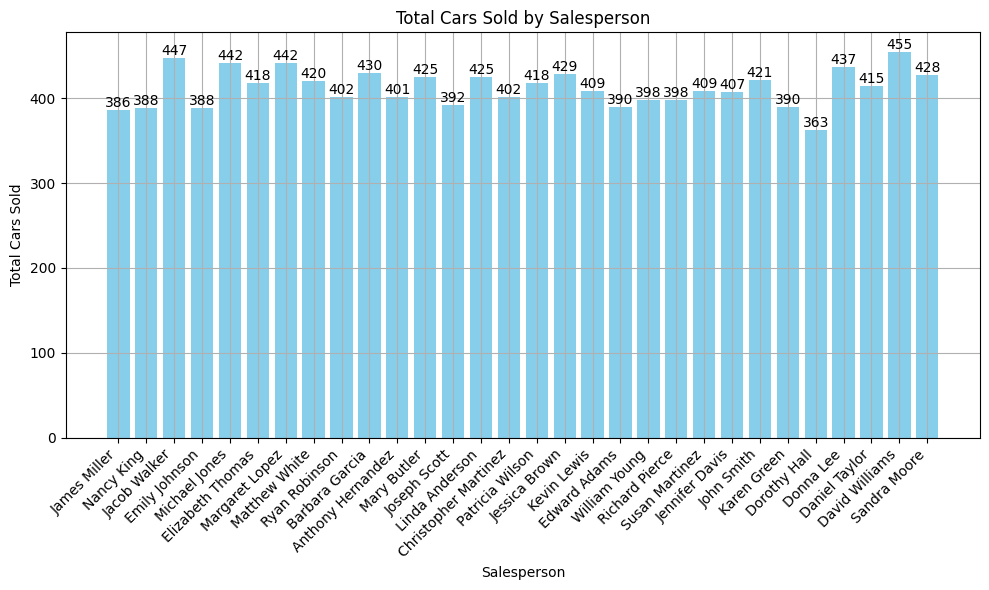

In [257]:
import matplotlib.pyplot as plt

# Assuming total_cars_by_salesperson is computed using PySpark DataFrame

# Convert to Pandas DataFrame for plotting
total_cars_by_salesperson_pandas = total_cars_by_salesperson.toPandas()

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(total_cars_by_salesperson_pandas["Salesperson"], total_cars_by_salesperson_pandas["Total Cars"], color='skyblue')
plt.xlabel('Salesperson')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold by Salesperson')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Adding labels to each bar
for bar, total_cars in zip(bars, total_cars_by_salesperson_pandas["Total Cars"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), total_cars, ha='center', va='bottom')

plt.show()


# Find Average cars per year

In [258]:
# Grouping the dataset by Year and calculating the total number of cars sold each year
total_cars_per_year = dataset.groupBy(F.year(F.to_date("Date", "M/d/yyyy")).alias("Year")).agg(F.count("Car Make").alias("Total Cars"))


# Calculating the average number of cars sold per year
average_cars_per_year = total_cars_per_year.select(F.avg("Total Cars").alias("Average Cars Per Year"))

# Showing the result
average_cars_per_year.show()


+---------------------+
|Average Cars Per Year|
+---------------------+
|    651.3157894736842|
+---------------------+



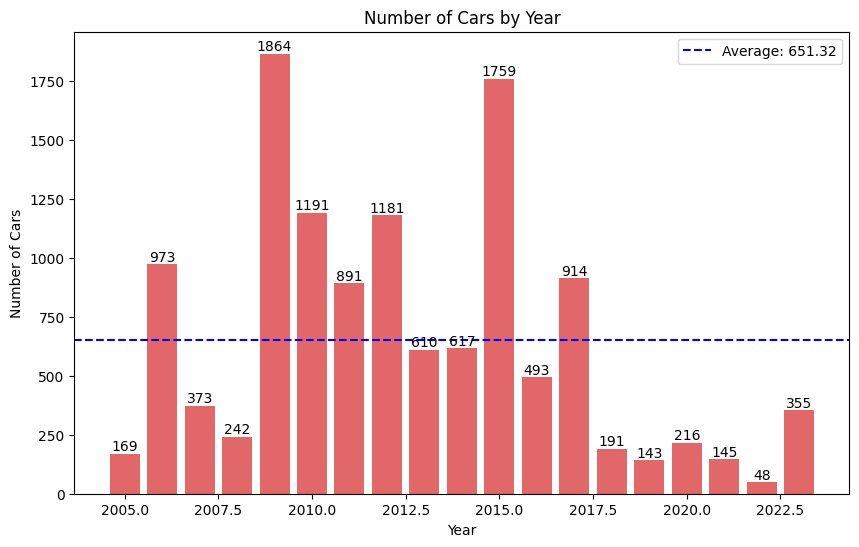

In [259]:
import numpy as np

# Calculate the average number of cars sold per year
average_car_count = np.mean(car_counts)

# Plotting the number of cars for each year using a column plot
plt.figure(figsize=(10, 6))
plt.bar(years, car_counts, color='tab:red', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Year')

# Adding labels for each column
for i, count in enumerate(car_counts):
    plt.text(years[i], count + 0.1, str(count), ha='center', va='bottom')

# Adding the average to the plot
plt.axhline(y=average_car_count, color='blue', linestyle='--', label=f'Average: {average_car_count:.2f}')
plt.legend()

plt.show()


# Find The golden Month (The best seller)

In [260]:
import numpy as np

# Calculate the average number of cars sold per month
average_car_count_month = {}
for month in range(1, 13):
    month_data = dataset.filter(F.month(F.to_date("Date", "M/d/yyyy")) == month).select("Sale Price").count()
    average_car_count_month[month] = month_data / len(years)  # Dividing by the number of years to get the monthly average

# Calculate the average number of cars sold per day
average_car_count_day = {}
for day in range(1, 32):  # Assuming maximum 31 days in a month
    day_data = dataset.filter(F.dayofmonth(F.to_date("Date", "M/d/yyyy")) == day).select("Sale Price").count()
    average_car_count_day[day] = day_data / (len(years) * 12)  # Dividing by the number of years and months to get the daily average
    # Print the average number of cars sold per month
print("Average Number of Cars Sold Per Month:")
for month, average_count in average_car_count_month.items():
    print(f"Month {month}: {average_count:.2f}")

# Print the average number of cars sold per day
print("\nAverage Number of Cars Sold Per Day:")
for day, average_count in average_car_count_day.items():
    print(f"Day {day}: {average_count:.2f}")



Average Number of Cars Sold Per Month:
Month 1: 55.37
Month 2: 46.74
Month 3: 55.53
Month 4: 54.05
Month 5: 56.21
Month 6: 53.11
Month 7: 53.53
Month 8: 57.68
Month 9: 53.53
Month 10: 56.16
Month 11: 54.89
Month 12: 54.53

Average Number of Cars Sold Per Day:
Day 1: 1.79
Day 2: 2.00
Day 3: 1.79
Day 4: 1.78
Day 5: 1.76
Day 6: 1.67
Day 7: 1.87
Day 8: 1.78
Day 9: 1.69
Day 10: 1.65
Day 11: 1.69
Day 12: 1.67
Day 13: 1.66
Day 14: 1.74
Day 15: 2.02
Day 16: 1.87
Day 17: 1.67
Day 18: 1.85
Day 19: 1.78
Day 20: 1.86
Day 21: 1.97
Day 22: 1.79
Day 23: 1.80
Day 24: 1.72
Day 25: 1.81
Day 26: 1.79
Day 27: 1.95
Day 28: 1.77
Day 29: 1.53
Day 30: 1.50
Day 31: 1.05


The Golden Month is: 8


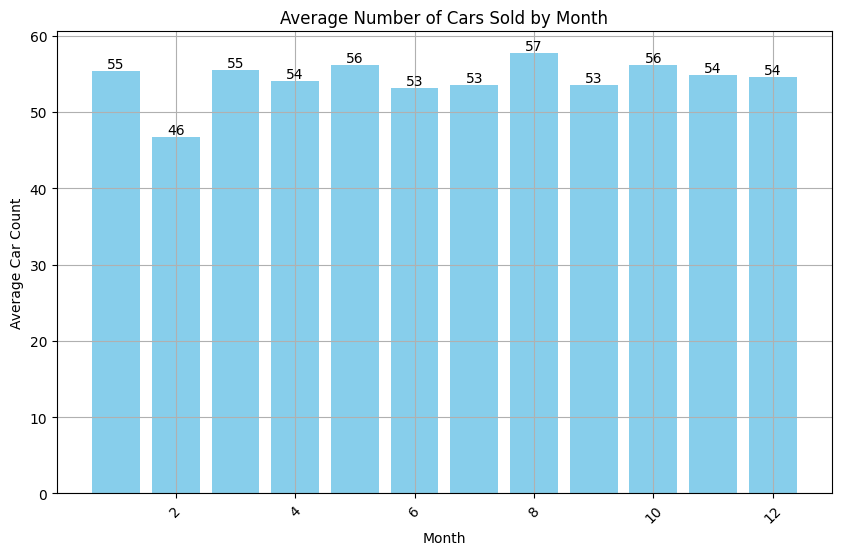

In [261]:
import matplotlib.pyplot as plt

# Assuming average_car_count_month contains the average number of cars sold for each month
months = list(average_car_count_month.keys())
average_car_counts = list(average_car_count_month.values())
golden_month = max(average_car_count_month, key=average_car_count_month.get)

print(f"The Golden Month is: {golden_month}")
# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(months, average_car_counts, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Car Count')
plt.title('Average Number of Cars Sold by Month')
plt.xticks(rotation=45)
plt.grid(True)

# Adding labels to each bar
for bar, count in zip(bars, average_car_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(count)), ha='center', va='bottom')

plt.show()


# Find The golden year ( best seller)

In [262]:
# Calculate the average number of cars sold per year
average_car_count_year = {}
for year in years:
    year_data = dataset.filter(F.year(F.to_date("Date", "M/d/yyyy")) == year).select("Sale Price").count()
    average_car_count_year[year] = year_data / 12  # Dividing by the number of months to get the yearly average

# Find the Golden Year (year with the highest average number of cars sold)
golden_year = max(average_car_count_year, key=average_car_count_year.get)

print(f"The Golden Year is: {golden_year}")


The Golden Year is: 2009


The Golden Year is: 2009


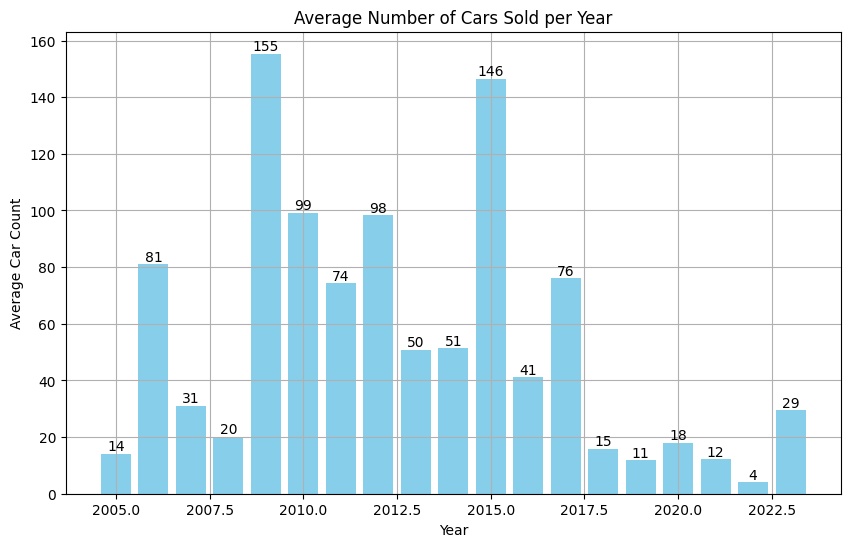

In [263]:
import matplotlib.pyplot as plt

# Calculate the average number of cars sold per year
average_car_count_year = {}
for year in years:
    year_data = dataset.filter(F.year(F.to_date("Date", "M/d/yyyy")) == year).select("Sale Price").count()
    average_car_count_year[year] = year_data / 12  # Dividing by the number of months to get the yearly average

# Find the Golden Year (year with the highest average number of cars sold)
golden_year = max(average_car_count_year, key=average_car_count_year.get)

print(f"The Golden Year is: {golden_year}")

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(average_car_count_year.keys(), average_car_count_year.values(), color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Car Count')
plt.title('Average Number of Cars Sold per Year')
plt.grid(True)

# Adding labels to each bar
for bar, count in zip(bars, average_car_count_year.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(count), ha='center', va='bottom')

plt.show()


# Find The average company revenue for each salesperson by year

In [264]:
from pyspark.sql import functions as F

# Grouping the dataset by year and calculating the average company revenue for each year
average_revenue_by_year = dataset.groupBy(F.year(F.to_date("Date", "M/d/yyyy")).alias("Year")) \
                                 .agg(F.avg("Company Revenue").alias("Average Company Revenue"))

# Sorting the DataFrame by the "Year" column
average_revenue_by_year_sorted = average_revenue_by_year.orderBy("Year")

# Showing the result
average_revenue_by_year_sorted.show()


+----+-----------------------+
|Year|Average Company Revenue|
+----+-----------------------+
|2005|     13402.975227798817|
|2006|      12433.71919146866|
|2007|     13135.235636689018|
|2008|      13278.36640576861|
|2009|     13360.387668903955|
|2010|     13712.153986673384|
|2011|     13776.563444058389|
|2012|     13110.315272720556|
|2013|     12410.471858872128|
|2014|     12368.758262711493|
|2015|     14631.052084460473|
|2016|     12109.017823178518|
|2017|     12849.887900682708|
|2018|     14913.697065560205|
|2019|     11863.106002090908|
|2020|     15558.242512217603|
|2021|     11901.601661172414|
|2022|     22228.468585000006|
|2023|     14758.985204980288|
+----+-----------------------+



In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming average_revenue_by_year contains the average company revenue for each year
years = average_revenue_by_year.select("Year").rdd.flatMap(lambda x: x).collect()
average_revenue = average_revenue_by_year.select("Average Company Revenue").rdd.flatMap(lambda x: x).collect()


# Calculate the average
average = np.mean(average_revenue)

print("Average:", average)
# # Plotting the data
# plt.figure(figsize=(10, 6))
# plt.plot(years, average_revenue, marker='o', color='skyblue')
# plt.xlabel('Year')
# plt.ylabel('Average Company Revenue')
# plt.title('Average Company Revenue by Year')
# plt.grid(True)
# plt.tight_layout()
# plt.show()


Average: 13779.105568158322


In [269]:
dataset.head()

Row(Date='4/28/2009', Salesperson='Jessica Brown', Customer='Customer_65768', Car Make='Ford', Car Year=2018, Original manufacture sale=64831.872, Car Tax rate=0.15, Gov Income=9724.7808, Profit Rate=0.25, Profit Income=18639.1632, Sale Price=93195.82, Commission Rate=0.12, Commission Earned=11183.49792, Company Revenue=17180.45008)

# Find the company revenue and average for each year

    Year  Total Company Revenue
0   2007           4.899443e+06
1   2018           2.848516e+06
2   2015           2.573602e+07
3   2023           5.239440e+06
4   2006           1.209801e+07
5   2022           1.066966e+06
6   2013           7.570388e+06
7   2014           7.631524e+06
8   2019           1.696424e+06
9   2020           3.360580e+06
10  2012           1.548328e+07
11  2009           2.490376e+07
12  2016           5.969746e+06
13  2005           2.265103e+06
14  2010           1.633118e+07
15  2011           1.227492e+07
16  2008           3.213365e+06
17  2017           1.174480e+07
18  2021           1.725732e+06


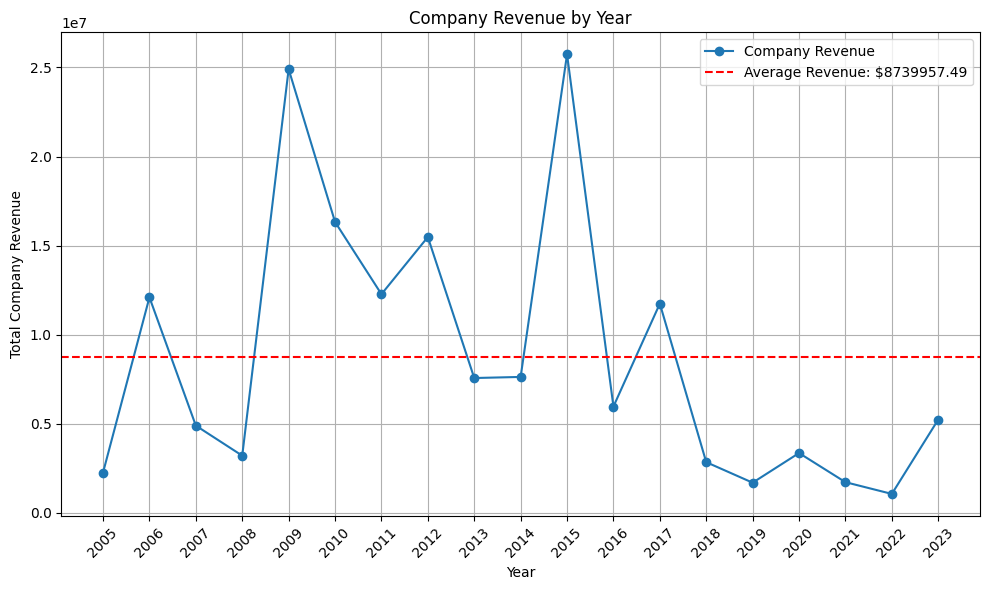

In [280]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import functions as F

# Use the correct date format string "yyyy-MM-dd" instead of "yyyy"
revenue_by_year = dataset.groupBy(F.year(F.to_date(dataset["Date"], "M/d/yyyy")).alias("Year")).agg(F.sum("Company Revenue").alias("Total Company Revenue"))

# Convert the DataFrame to Pandas for plotting and sorting by year
revenue_by_year_pandas = revenue_by_year.toPandas()
print(revenue_by_year_pandas)
# Create a list of years from 2005 to 2023
all_years = list(range(2005, 2024))

# Fill in missing years with zero revenue
revenue_by_year_filled = revenue_by_year_pandas.set_index("Year").reindex(all_years, fill_value=0).reset_index()

# Calculate the average revenue
average_revenue = revenue_by_year_filled["Total Company Revenue"].mean()

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting the company revenue for each year
plt.plot(revenue_by_year_filled["Year"], revenue_by_year_filled["Total Company Revenue"], marker='o', label='Company Revenue')

# Plotting the average revenue line
plt.axhline(y=average_revenue, color='red', linestyle='--', label=f'Average Revenue: ${average_revenue:.2f}')

plt.xlabel('Year')
plt.ylabel('Total Company Revenue')
plt.title('Company Revenue by Year')
plt.xticks(np.arange(2005, 2024, 1), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Find Deep dive of drop the company revenue

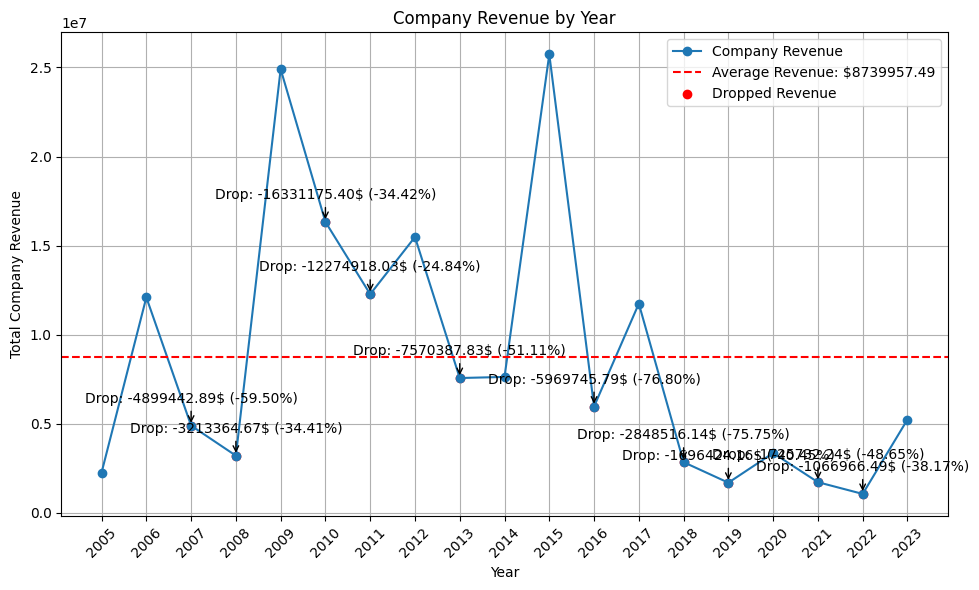

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to Pandas for plotting and sorting by year
revenue_by_year_pandas = revenue_by_year.toPandas()

# Create a list of years from 2005 to 2023
all_years = list(range(2005, 2024))

# Fill in missing years with zero revenue
revenue_by_year_filled = revenue_by_year_pandas.set_index("Year").reindex(all_years, fill_value=0).reset_index()

# Calculate the average revenue
average_revenue = revenue_by_year_filled["Total Company Revenue"].mean()

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting the company revenue for each year
plt.plot(revenue_by_year_filled["Year"], revenue_by_year_filled["Total Company Revenue"], marker='o', label='Company Revenue')

# Plotting the average revenue line
plt.axhline(y=average_revenue, color='red', linestyle='--', label=f'Average Revenue: ${average_revenue:.2f}')

# Convert the DataFrame to Pandas for easier manipulation
revenue_by_year_pandas = revenue_by_year_pandas.set_index("Year").reindex(all_years, fill_value=0).reset_index()

# Calculate the difference in revenue between consecutive years
revenue_diff = revenue_by_year_pandas["Total Company Revenue"].diff()

# Filter the years where revenue dropped
dropped_years = revenue_by_year_pandas[revenue_diff < 0]

# Highlighting the years where revenue dropped
plt.scatter(dropped_years["Year"], dropped_years["Total Company Revenue"], color='red', label='Dropped Revenue')

# Adding annotations for the dropped years
for year, revenue in zip(dropped_years["Year"], dropped_years["Total Company Revenue"]):
    prev_year_revenue = revenue_by_year_pandas.loc[revenue_by_year_pandas["Year"] == year - 1, "Total Company Revenue"].iloc[0]
    percentage_drop = ((prev_year_revenue - revenue) / prev_year_revenue) * 100
    plt.annotate(f'Drop: -{revenue:.2f}$ (-{percentage_drop:.2f}%)', xy=(year, revenue), xytext=(year, revenue + 0.05 * max(revenue_by_year_pandas["Total Company Revenue"])),
                 arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, ha='center')

plt.xlabel('Year')
plt.ylabel('Total Company Revenue')
plt.title('Company Revenue by Year')
plt.xticks(np.arange(2005, 2024, 1), rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Find Deep dive of increase the company revenue

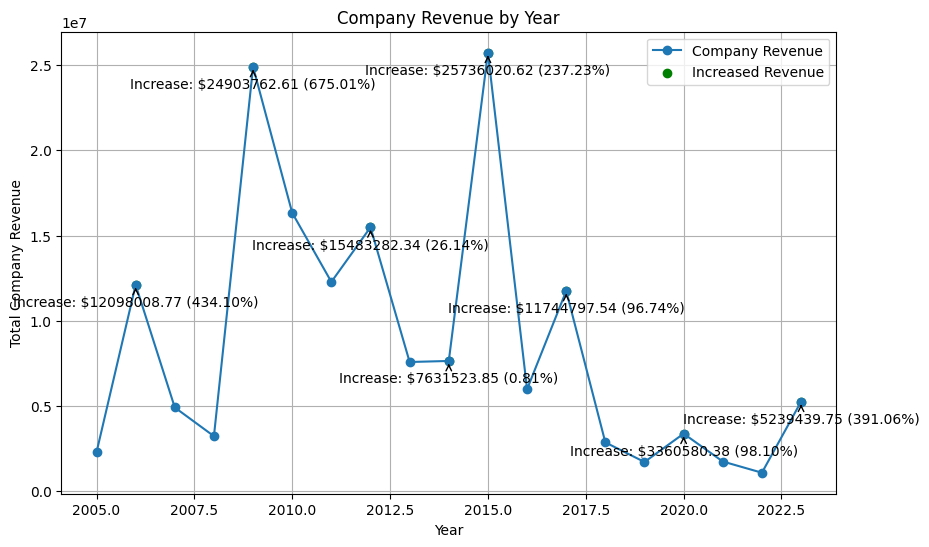

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to Pandas for easier manipulation
revenue_by_year_pandas = revenue_by_year.orderBy("Year").toPandas()

# Calculate the difference in revenue between consecutive years
revenue_diff = revenue_by_year_pandas["Total Company Revenue"].diff()

# Filter the years where revenue increased
increased_years = revenue_by_year_pandas[revenue_diff > 0]

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting the company revenue for each year
plt.plot(revenue_by_year_pandas["Year"], revenue_by_year_pandas["Total Company Revenue"], marker='o', label='Company Revenue')

# Highlighting the years where revenue increased
plt.scatter(increased_years["Year"], increased_years["Total Company Revenue"], color='green', label='Increased Revenue')

# Adding annotations for the increased years
for year, revenue in zip(increased_years["Year"], increased_years["Total Company Revenue"]):
    prev_year_revenue = revenue_by_year_pandas.loc[revenue_by_year_pandas["Year"] == year - 1, "Total Company Revenue"].iloc[0]
    percentage_increase = ((revenue - prev_year_revenue) / prev_year_revenue) * 100
    plt.annotate(f'Increase: ${revenue:.2f} ({percentage_increase:.2f}%)', xy=(year, revenue), xytext=(year, revenue - 0.05 * max(revenue_by_year_pandas["Total Company Revenue"])),
                 arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, ha='center')

plt.xlabel('Year')
plt.ylabel('Total Company Revenue')
plt.title('Company Revenue by Year')
plt.grid(True)
plt.legend()
plt.show()


# 2. Find the total sales by car make for each year

In [ ]:
# Convert "Date" column to DateType
dataset = dataset.withColumn("Date", F.to_date("Date", "M/d/yyyy"))

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and Car Make and calculate count of Car Make
car_make_by_year = dataset.groupBy("Year", "Car Make").agg(
    F.count("Car Make").alias("Number of Cars")
)

# Sort the results by year
car_make_by_year_sorted = car_make_by_year.orderBy("Year", ascending=False)

# Show the result
car_make_by_year_sorted.show(1000)

+----+-----------+--------------+
|Year|   Car Make|Number of Cars|
+----+-----------+--------------+
|2023|      Honda|            75|
|2023|  Chevrolet|            42|
|2023|     Toyota|            47|
|2023|       Ford|            24|
|2023|     Nissan|            43|
|2023|      Mazda|            33|
|2023|Lamborghini|            15|
|2023|        BMW|            33|
|2023|      Tesla|            34|
|2023|   Mercedes|             9|
|2022|  Chevrolet|             4|
|2022|      Honda|             5|
|2022|      Mazda|             1|
|2022|        BMW|             9|
|2022|      Tesla|             2|
|2022|       Ford|             4|
|2022|     Nissan|             6|
|2022|     Toyota|            12|
|2022|   Mercedes|             2|
|2022|Lamborghini|             3|
|2021|      Mazda|            16|
|2021|     Nissan|            22|
|2021|     Toyota|            22|
|2021|  Chevrolet|            13|
|2021|        BMW|            19|
|2021|   Mercedes|             3|
|2021|      Ho

In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
# dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and calculate the total sale for each year
total_sales_by_year = dataset.groupBy("Year").agg(
    F.sum("Sale Price").alias("Total Sales"),
    F.count("Car Make").alias("Number of Cars")
)

# Sort the result by year
total_sales_by_year = total_sales_by_year.orderBy("Year")

# Show the result
total_sales_by_year.show()


+----+--------------------+--------------+
|Year|         Total Sales|Number of Cars|
+----+--------------------+--------------+
|2005|1.0213069190000007E7|           169|
|2006| 5.444284611999998E7|           973|
|2007|2.1572838529999983E7|           373|
|2008|1.4305768759999998E7|           242|
|2009|1.1334518930999997E8|          1864|
|2010| 7.379768755000006E7|          1191|
|2011| 5.485169683999996E7|           891|
|2012| 6.947449118999998E7|          1181|
|2013| 3.381776344000002E7|           610|
|2014|3.4306216299999945E7|           617|
|2015|1.1558360262999998E8|          1759|
|2016|2.7440499370000005E7|           493|
|2017| 5.304775805999998E7|           914|
|2018| 1.270967406000001E7|           191|
|2019|   7797019.020000004|           143|
|2020|1.5051157509999994E7|           216|
|2021|   7650672.890000002|           145|
|2022|   4617893.119999998|            48|
|2023|       2.432211412E7|           355|
+----+--------------------+--------------+



In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and calculate the total sale for each year
total_sales_by_year = dataset.groupBy("Year").agg(
    F.sum("Sale Price").alias("Total Sales"),
    F.count("Car Make").alias("Number of Cars")
)

# Calculate the total number of distinct years in the dataset
total_years = dataset.select(F.countDistinct("Year")).collect()[0][0]

# Calculate the average number of cars sold per year
average_cars_per_year = total_sales_by_year.groupBy().avg("Number of Cars").collect()[0][0]

# Sort the result by year
total_sales_by_year = total_sales_by_year.orderBy("Year")

# Show the result
total_sales_by_year.show()

# Show the average number of cars sold per year
print("Average Number of Cars Sold per Year:", average_cars_per_year)


+----+--------------------+--------------+
|Year|         Total Sales|Number of Cars|
+----+--------------------+--------------+
|2005|1.0213069190000007E7|           169|
|2006| 5.444284611999998E7|           973|
|2007|2.1572838529999983E7|           373|
|2008|1.4305768759999998E7|           242|
|2009|1.1334518930999997E8|          1864|
|2010| 7.379768755000006E7|          1191|
|2011| 5.485169683999996E7|           891|
|2012| 6.947449118999998E7|          1181|
|2013| 3.381776344000002E7|           610|
|2014|3.4306216299999945E7|           617|
|2015|1.1558360262999998E8|          1759|
|2016|2.7440499370000005E7|           493|
|2017| 5.304775805999998E7|           914|
|2018| 1.270967406000001E7|           191|
|2019|   7797019.020000004|           143|
|2020|1.5051157509999994E7|           216|
|2021|   7650672.890000002|           145|
|2022|   4617893.119999998|            48|
|2023|       2.432211412E7|           355|
+----+--------------------+--------------+

Average Nu

# Predict target sale per year


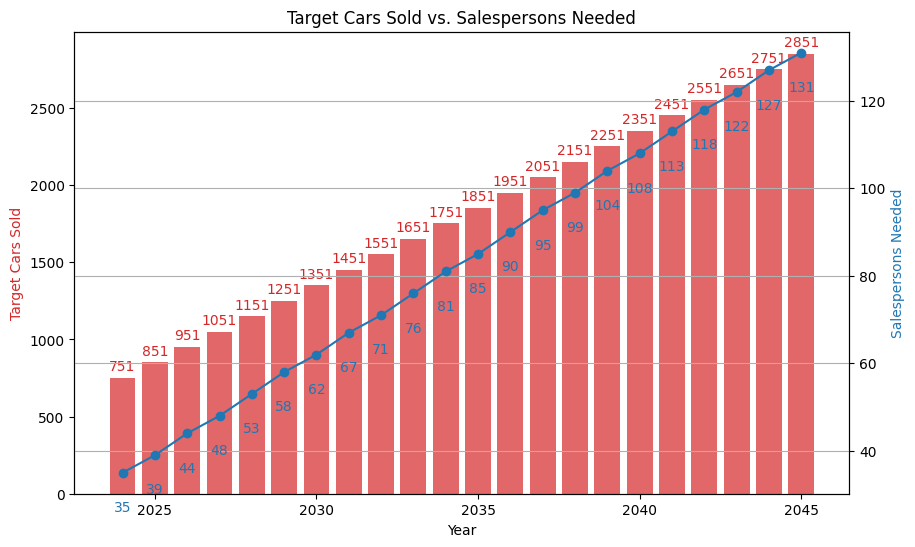

In [ ]:
import matplotlib.pyplot as plt

# Initial values
initial_cars_sold_per_year = 651
initial_salespersons = 30
target_year = 2045
target_cars_sold_per_year = initial_cars_sold_per_year + (target_year - 2023) * 100  # Increase by 100 cars each year

# Calculate the number of salespersons needed for each year
salespersons_needed = {}
for year in range(2024, target_year + 1):
    additional_cars_sold = (year - 2023) * 100
    total_cars_sold = initial_cars_sold_per_year + additional_cars_sold
    salespersons_needed[year] = round((total_cars_sold / initial_cars_sold_per_year) * initial_salespersons)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the target number of cars sold per year as a column
ax1.bar(range(2024, target_year + 1), [initial_cars_sold_per_year + (year - 2023) * 100 for year in range(2024, target_year + 1)], color='tab:red', alpha=0.7, label='Target Cars Sold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Target Cars Sold', color='tab:red')

# Adding labels for each point on the column graph
for year, target_cars_sold in zip(range(2024, target_year + 1), [initial_cars_sold_per_year + (year - 2023) * 100 for year in range(2024, target_year + 1)]):
    ax1.annotate(f'{target_cars_sold}', xy=(year, target_cars_sold), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', color='tab:red')

# Creating a secondary y-axis for the number of salespersons needed
ax2 = ax1.twinx()
ax2.plot(list(salespersons_needed.keys()), list(salespersons_needed.values()), marker='o', color='tab:blue', label='Salespersons Needed')
ax2.set_ylabel('Salespersons Needed', color='tab:blue')

# Adding labels for each point on the line graph
for year, salespersons in salespersons_needed.items():
    ax2.annotate(f'{salespersons}', xy=(year, salespersons), xytext=(0, -30), textcoords='offset points', ha='center', va='bottom', color='tab:blue')

plt.title('Target Cars Sold vs. Salespersons Needed')
plt.grid(True)
plt.show()


# Predict Company Revenue from (2005 to 2024) Vs (2024 to 2045)


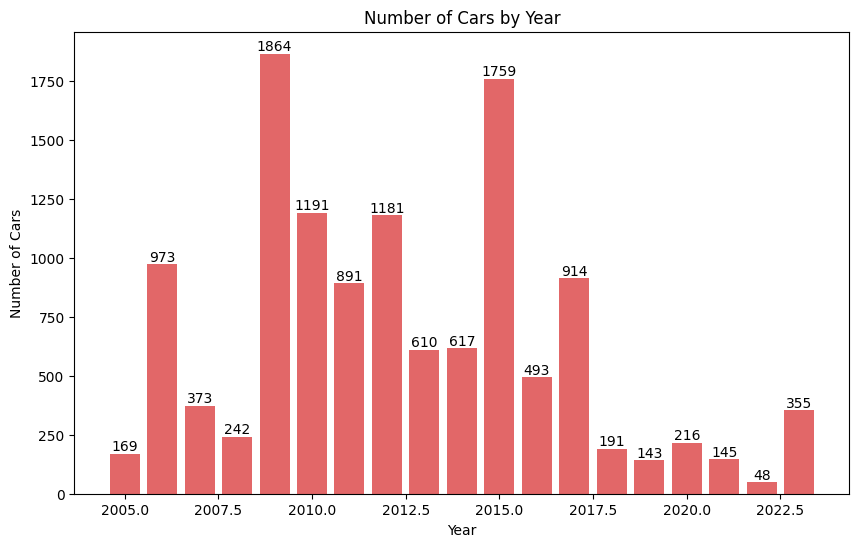

In [ ]:
import matplotlib.pyplot as plt

# Assuming the dataset is already grouped and aggregated as 'sales_by_year'

# Extracting data for plotting
years = sales_by_year.select("Year").rdd.flatMap(lambda x: x).collect()
car_counts = sales_by_year.select("Number of Cars").rdd.flatMap(lambda x: x).collect()

# Define additional years from 2024 to 2040
additional_years = list(range(2024, 204))

# Predicting the number of cars for each additional year, assuming an increase of 100 cars sold per year
projected_car_counts = [car_counts[-1] + (year - 2023) * 100 for year in additional_years]

# Combining existing and projected data
all_years = years + additional_years
all_car_counts = car_counts + projected_car_counts

# Plotting the number of cars for each year using a column plot
plt.figure(figsize=(10, 6))
plt.bar(all_years, all_car_counts, color='tab:red', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Year')

# Adding labels for each column
for i, count in enumerate(all_car_counts):
    plt.text(all_years[i], count + 0.1, str(count), ha='center', va='bottom')

plt.show()


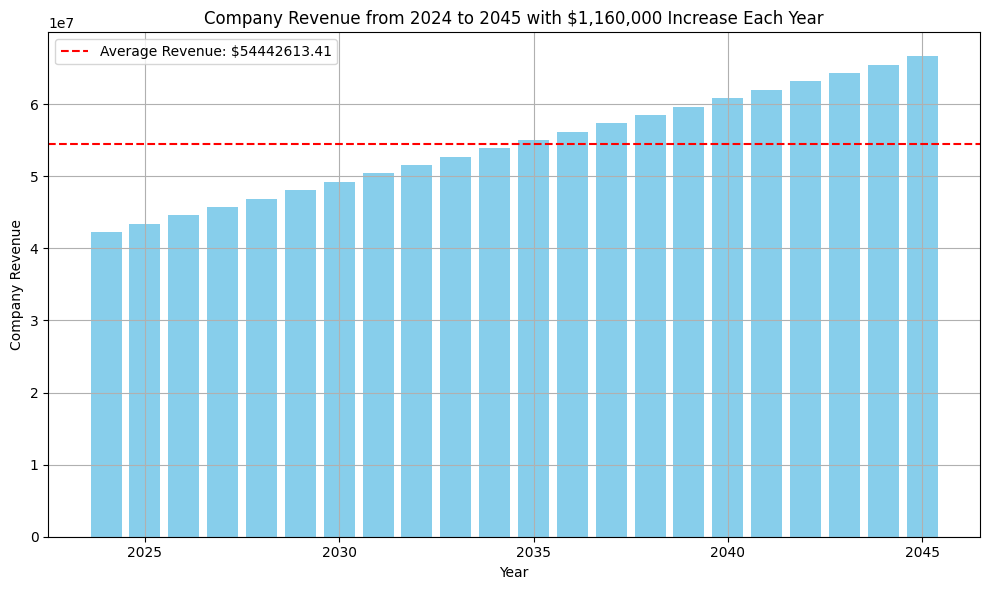

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy revenue data for the years 2024 to 2045
years = range(2024, 2046)
initial_revenue = np.random.uniform(8000000, 50000000)  # Initial revenue value for 2024
revenue = [initial_revenue + 1160000 * (year - 2023) for year in years]  # Increase by 1160000 each year

# Calculate the average revenue
average_revenue = np.mean(revenue)

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(years, revenue, color='skyblue')
plt.axhline(y=average_revenue, color='red', linestyle='--', label=f'Average Revenue: ${average_revenue:.2f}')
plt.xlabel('Year')
plt.ylabel('Company Revenue')
plt.title('Company Revenue from 2024 to 2045 with $1,160,000 Increase Each Year')

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


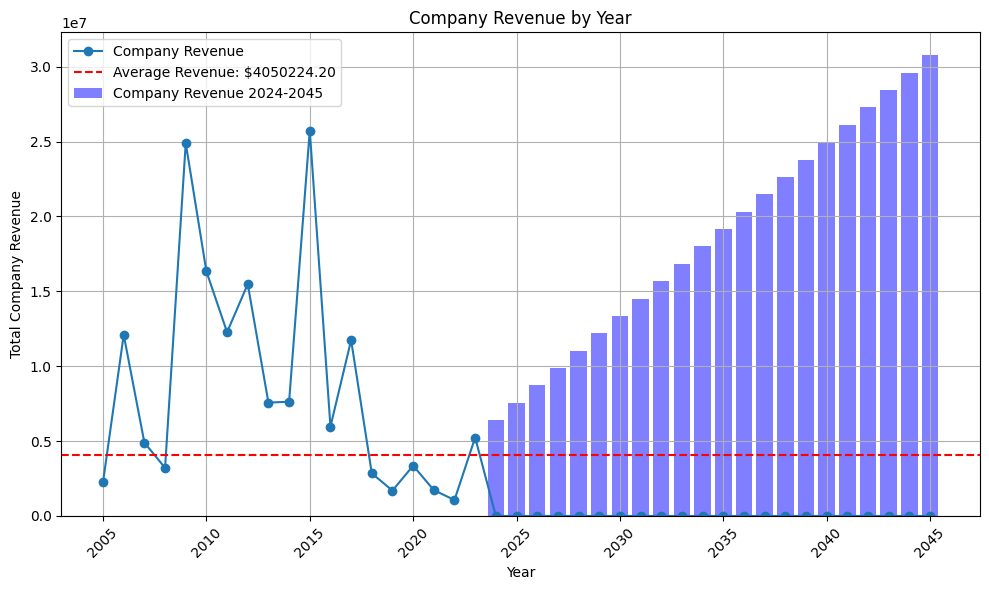

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql import functions as F

# Use the correct date format string "yyyy-MM-dd" instead of "yyyy"
revenue_by_year = dataset.groupBy(F.year(F.to_date("Date", "yyyy-MM-dd")).alias("Year")).agg(F.sum("Company Revenue").alias("Total Company Revenue"))

# Convert the DataFrame to Pandas for plotting and sorting by year
revenue_by_year_pandas = revenue_by_year.toPandas()

# Create a list of years from 2005 to 2045
all_years = list(range(2005, 2046))

# Fill in missing years with zero revenue
revenue_by_year_filled = revenue_by_year_pandas.set_index("Year").reindex(all_years, fill_value=0).reset_index()

# Calculate the average revenue
average_revenue = revenue_by_year_filled["Total Company Revenue"].mean()

# Plotting the graph
plt.figure(figsize=(10, 6))

# Plotting the company revenue for each year
plt.plot(revenue_by_year_filled["Year"], revenue_by_year_filled["Total Company Revenue"], marker='o', label='Company Revenue')

# Plotting the average revenue line
plt.axhline(y=average_revenue, color='red', linestyle='--', label=f'Average Revenue: ${average_revenue:.2f}')

# Generating increased revenue data for the years 2024 to 2045
years = range(2024, 2046)
increased_revenue = [revenue_by_year_filled.loc[revenue_by_year_filled['Year'] == 2023, 'Total Company Revenue'].values[0] + 1160000 * (year - 2023) for year in years]

# Plotting the increased revenue data
bars = plt.bar(years, increased_revenue, color='blue', alpha=0.5, label='Company Revenue 2024-2045')

plt.xlabel('Year')
plt.ylabel('Total Company Revenue')
plt.title('Company Revenue by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Recommandation The best seller car ever

Car with the highest demand: Toyota


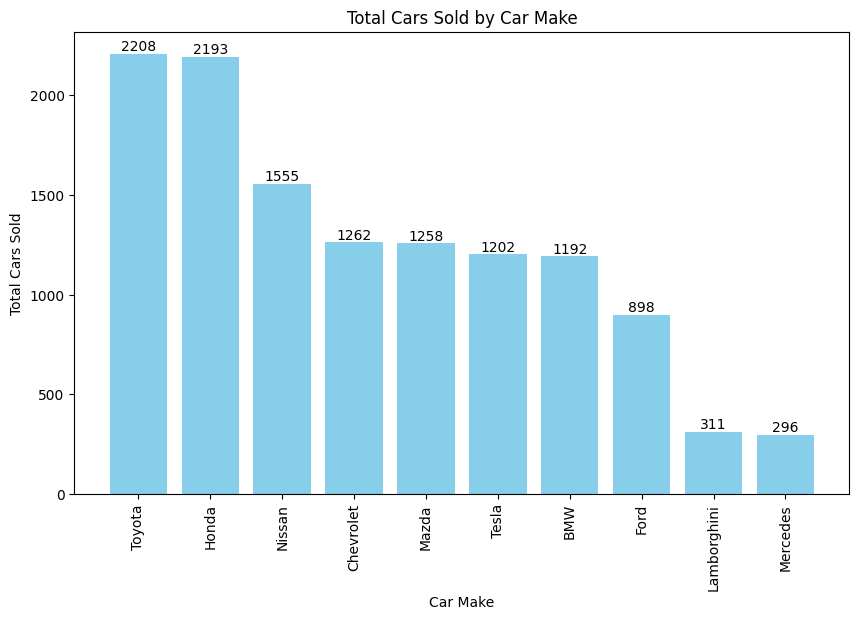

In [ ]:
import matplotlib.pyplot as plt

# Extracting data for plotting
car_make_names = car_make_total_sales_sorted.select("Car Make").rdd.flatMap(lambda x: x).collect()
# Sort the results by total cars sold in descending order
car_make_total_sales_sorted = car_make_total_sales.orderBy(F.desc("Total Cars Sold"))

# Show the car make with the highest demand
highest_demand_car = car_make_total_sales_sorted.first()["Car Make"]
print("Car with the highest demand:", highest_demand_car)


# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(car_make_names, total_cars_sold, color='skyblue')
plt.xlabel('Car Make')
plt.ylabel('Total Cars Sold')
plt.title('Total Cars Sold by Car Make')

# Adding labels for each column
for i in range(len(car_make_names)):
    plt.text(i, total_cars_sold[i], str(total_cars_sold[i]), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


# Find the number of growth for each Car Make:

In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and Car Make and calculate count of Car Make
car_make_by_year = dataset.groupBy("Year", "Car Make").agg(
    F.count("Car Make").alias("Number of Cars")
)

# Self join to subtract counts for consecutive years
car_make_by_year_joined = car_make_by_year.alias("df1").join(
    car_make_by_year.alias("df2"),
    (F.col("df1.Car Make") == F.col("df2.Car Make")) & (F.col("df1.Year") == F.col("df2.Year") + 1),
    "left_outer"
).select(
    F.col("df1.Car Make").alias("Car Make"),
    (F.col("df1.Number of Cars") - F.col("df2.Number of Cars")).alias("Cars Growth")
)

# Filter out null values
car_make_by_year_filtered = car_make_by_year_joined.filter(F.col("Cars Growth").isNotNull())

# Show the result
car_make_by_year_filtered.show()


+---------+-----------+
| Car Make|Cars Growth|
+---------+-----------+
|   Nissan|        142|
|    Mazda|          8|
|    Tesla|        -74|
|Chevrolet|        -23|
|    Honda|         70|
|   Toyota|        277|
|    Honda|       -118|
|Chevrolet|         38|
|Chevrolet|         -9|
|   Toyota|        130|
|Chevrolet|        -15|
|   Nissan|        -81|
|      BMW|        -14|
|   Nissan|        -61|
|    Honda|         65|
|Chevrolet|        -61|
| Mercedes|         12|
|    Honda|        -21|
| Mercedes|        -10|
|    Mazda|         -4|
+---------+-----------+
only showing top 20 rows



In [ ]:
import pyspark.sql.functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and Car Make and calculate count of Car Make
car_make_by_year = dataset.groupBy("Year", "Car Make").agg(
    F.count("Car Make").alias("Number of Cars")
)

# Self join to subtract counts for consecutive years
car_make_by_year_joined = car_make_by_year.alias("df1").join(
    car_make_by_year.alias("df2"),
    (F.col("df1.Car Make") == F.col("df2.Car Make")) & (F.col("df1.Year") == F.col("df2.Year") + 1),
    "left_outer"
).select(
    F.col("df1.Year").alias("Year"),
    F.col("df1.Car Make").alias("Car Make"),
    (F.col("df1.Number of Cars") - F.col("df2.Number of Cars")).alias("Cars Growth")
)

# Filter out null values
car_make_by_year_filtered = car_make_by_year_joined.filter(F.col("Cars Growth").isNotNull())

# Show the result
car_make_by_year_filtered.show()


+----+---------+-----------+
|Year| Car Make|Cars Growth|
+----+---------+-----------+
|2015|   Nissan|        142|
|2020|    Mazda|          8|
|2010|    Tesla|        -74|
|2011|Chevrolet|        -23|
|2023|    Honda|         70|
|2009|   Toyota|        277|
|2007|    Honda|       -118|
|2023|Chevrolet|         38|
|2022|Chevrolet|         -9|
|2006|   Toyota|        130|
|2008|Chevrolet|        -15|
|2010|   Nissan|        -81|
|2011|      BMW|        -14|
|2013|   Nissan|        -61|
|2017|    Honda|         65|
|2007|Chevrolet|        -61|
|2017| Mercedes|         12|
|2022|    Honda|        -21|
|2013| Mercedes|        -10|
|2014|    Mazda|         -4|
+----+---------+-----------+
only showing top 20 rows



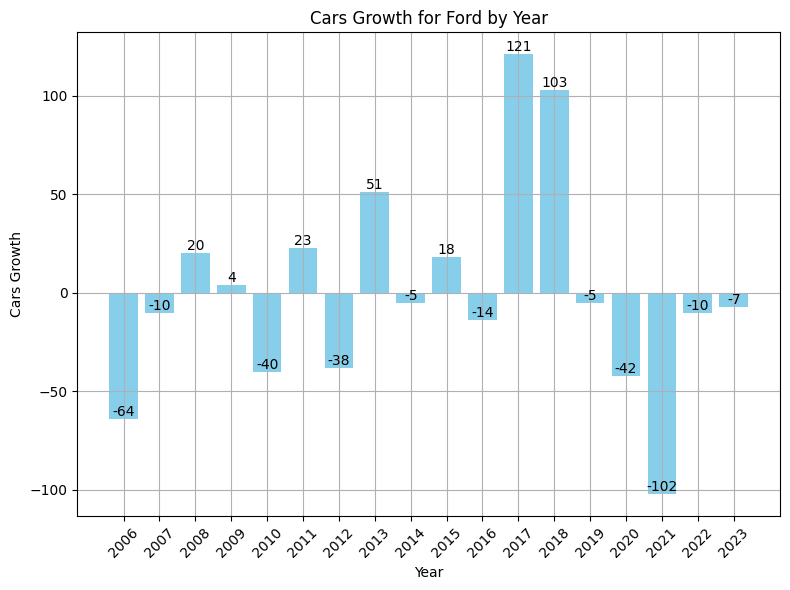

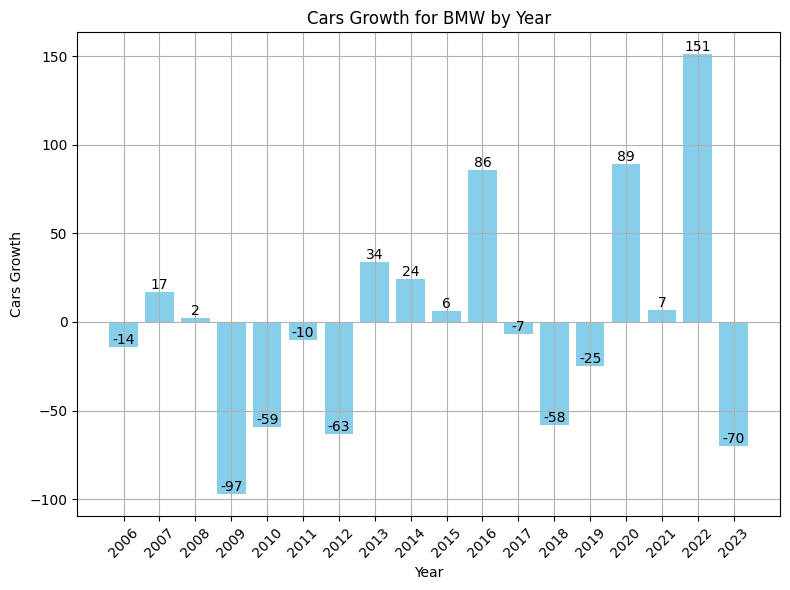

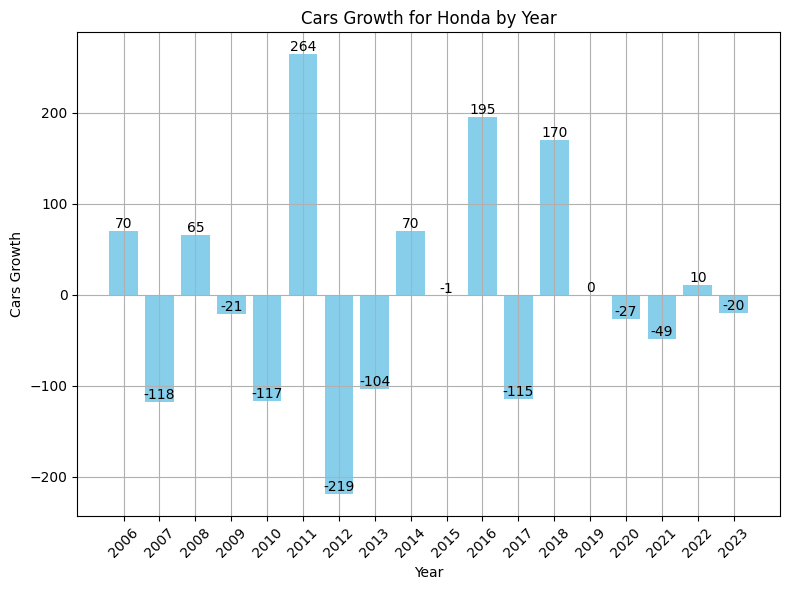

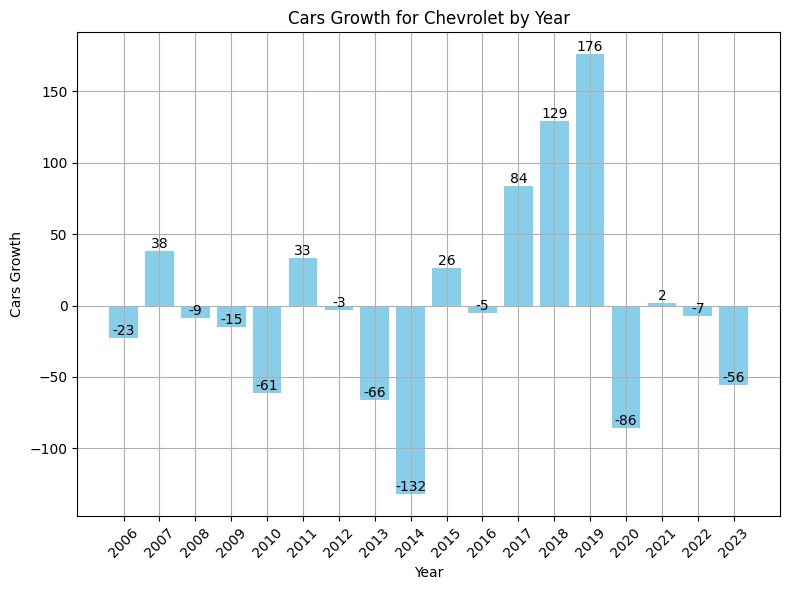

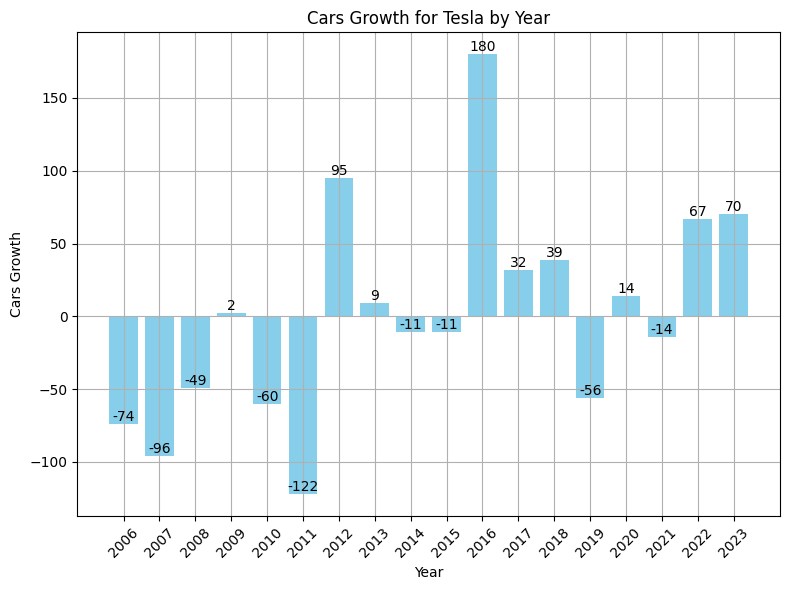

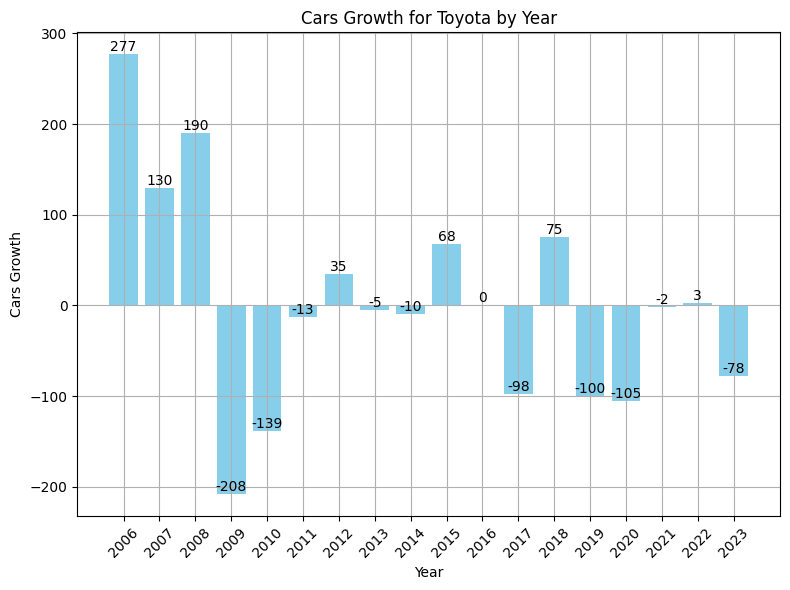

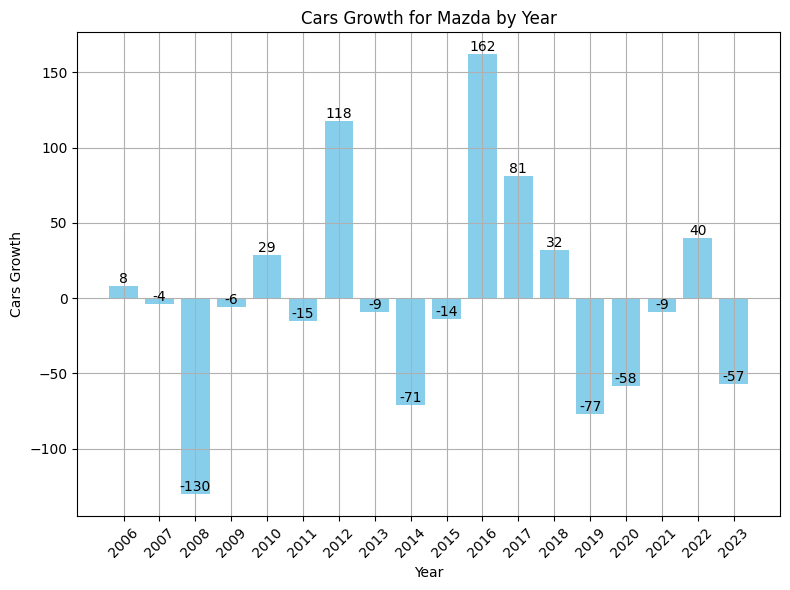

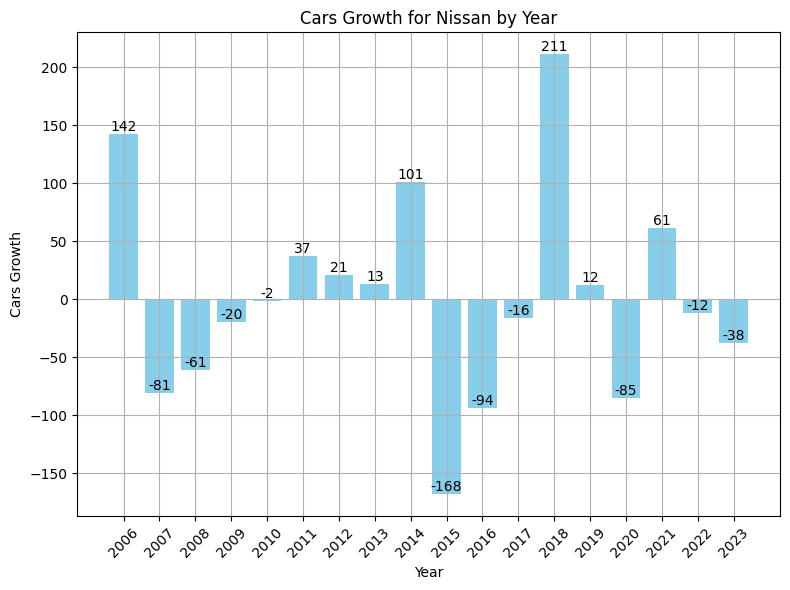

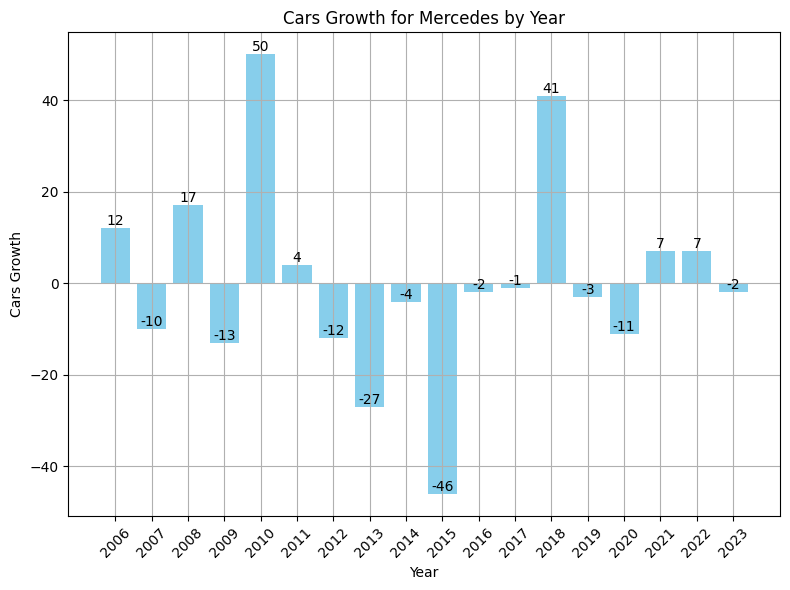

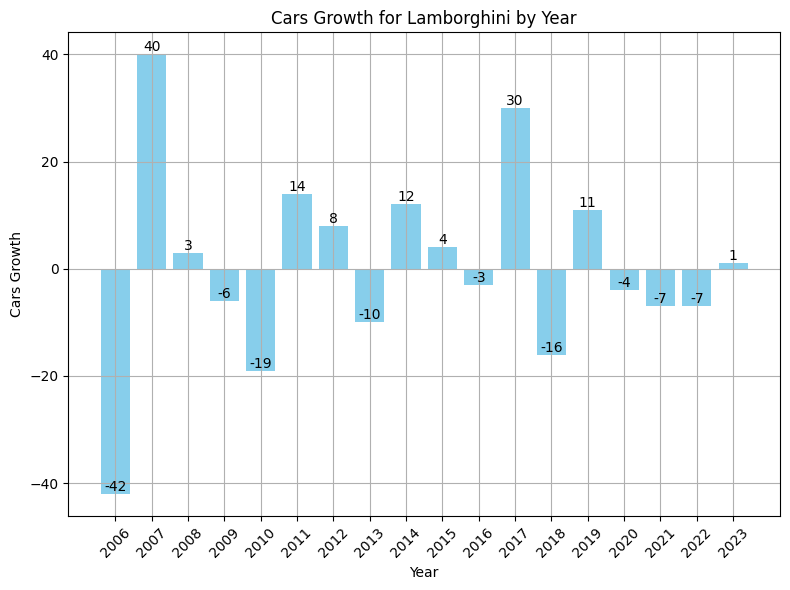

In [ ]:
import pyspark.sql.functions as F

# Filter dataset for the years 2005 to 2023
filtered_dataset = dataset.filter((F.year("Date") >= 2005) & (F.year("Date") <= 2023))

# Group by Car Make and calculate the mean year of appearance
car_make_mean_year = filtered_dataset.groupBy("Car Make").agg(
    F.avg(F.year("Date")).alias("Mean Year")
)

# Sort car makes by the mean year
car_makes = car_make_mean_year.orderBy("Mean Year").select("Car Make").rdd.flatMap(lambda x: x).collect()

# Plotting the data for each car make
for car_make in car_makes:
    # Filter data for the current car make
    filtered_data = car_make_by_year_filtered.filter(car_make_by_year_filtered["Car Make"] == car_make)

    # Extracting data for plotting
    years = filtered_data.select("Year").rdd.flatMap(lambda x: x).collect()
    growth_by_year = filtered_data.select("Cars Growth").rdd.flatMap(lambda x: x).collect()

    # Sort years in ascending order
    years.sort()

    # Plotting the data
    plt.figure(figsize=(8, 6))
    bars = plt.bar([str(year) for year in years], growth_by_year, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Cars Growth')
    plt.title(f'Cars Growth for {car_make} by Year')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Adding labels to each bar
    for bar, growth in zip(bars, growth_by_year):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{growth}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# Find % of growth or drop for each Car Make

In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year and Car Make and calculate count of Car Make
car_make_by_year = dataset.groupBy("Year", "Car Make").agg(
    F.count("Car Make").alias("Number of Cars")
)

# Self join to subtract counts for consecutive years
car_make_by_year_joined = car_make_by_year.alias("df1").join(
    car_make_by_year.alias("df2"),
    (F.col("df1.Car Make") == F.col("df2.Car Make")) & (F.col("df1.Year") == F.col("df2.Year") + 1),
    "left_outer"
).select(
    F.col("df1.Car Make").alias("Car Make"),
    (F.col("df1.Number of Cars") - F.col("df2.Number of Cars")).alias("Cars Growth"),
    ((F.col("df1.Number of Cars") - F.col("df2.Number of Cars")) / F.col("df2.Number of Cars") * 100).alias("Percentage Growth")
)

# Filter out null values
car_make_by_year_filtered = car_make_by_year_joined.filter(F.col("Cars Growth").isNotNull())

# Show the result
car_make_by_year_filtered.show()


+---------+-----------+-------------------+
| Car Make|Cars Growth|  Percentage Growth|
+---------+-----------+-------------------+
|   Nissan|        142| 173.17073170731706|
|    Mazda|          8|  57.14285714285714|
|    Tesla|        -74|-36.633663366336634|
|Chevrolet|        -23|              -20.0|
|    Honda|         70|             1400.0|
|   Toyota|        277|  532.6923076923076|
|    Honda|       -118|-61.458333333333336|
|Chevrolet|         38|              950.0|
|Chevrolet|         -9| -69.23076923076923|
|   Toyota|        130| 481.48148148148147|
|Chevrolet|        -15|              -37.5|
|   Nissan|        -81|-34.177215189873415|
|      BMW|        -14|-12.727272727272727|
|   Nissan|        -61| -46.92307692307692|
|    Honda|         65|  74.71264367816092|
|Chevrolet|        -61|-60.396039603960396|
| Mercedes|         12| 171.42857142857142|
|    Honda|        -21| -80.76923076923077|
| Mercedes|        -10| -41.66666666666667|
|    Mazda|         -4| -5.71428

In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year, Car Make, Car Model, and Car Year and calculate sum of Sale Price and count of Car Make
total_sales_by_car_make_model = dataset.groupBy("Year", "Car Make").agg(
    F.sum("Sale Price").alias("Total Sales"),
    F.count("Car Make").alias("Number of Cars")
)

# Sort the results by Car Make in descending order
total_sales_by_car_make_model_sorted = total_sales_by_car_make_model.orderBy("Car Make", ascending=False)

# Show the result
total_sales_by_car_make_model_sorted.show(1000)


+----+-----------+--------------------+--------------+
|Year|   Car Make|         Total Sales|Number of Cars|
+----+-----------+--------------------+--------------+
|2009|     Toyota|1.0796479709999999E7|           329|
|2006|     Toyota|   5099660.899999999|           157|
|2015|     Toyota|   9995772.099999998|           304|
|2016|     Toyota|  3173901.3199999994|            96|
|2018|     Toyota|  1003623.0700000002|            32|
|2021|     Toyota|   751060.0399999998|            22|
|2023|     Toyota|  1608443.3499999996|            47|
|2008|     Toyota|          1662705.37|            52|
|2022|     Toyota|  340931.24000000005|            12|
|2012|     Toyota|          7220888.28|           221|
|2019|     Toyota|  1057039.8399999996|            32|
|2010|     Toyota|   7635897.809999996|           231|
|2017|     Toyota|   5513496.089999998|           171|
|2007|     Toyota|  1846448.8200000005|            57|
|2013|     Toyota|   3824631.169999999|           116|
|2014|    

# Find calculate average Commission Earned

In [ ]:
from pyspark.sql import functions as F

# Extract year from Date column
dataset = dataset.withColumn("Year", F.year("Date"))

# Group by Year, Salesperson, and calculate average Commission Earned
average_commission_by_salesperson = dataset.groupBy("Year", "Salesperson").agg(
    F.avg("Commission Earned").alias("Average Commission Earned")
)
average_commission_by_salesperson_sorted = average_commission_by_salesperson.orderBy("Year", ascending=False)
# Show the result
average_commission_by_salesperson_sorted.show(100)


+----+--------------------+-------------------------+
|Year|         Salesperson|Average Commission Earned|
+----+--------------------+-------------------------+
|2023|      Margaret Lopez|       2611.1844159461543|
|2023|       Jessica Brown|        5851.605282523077|
|2023|           Donna Lee|       12380.935211999999|
|2023|   Anthony Hernandez|       12841.110191705884|
|2023|        Jacob Walker|           8208.982655625|
|2023|       Emily Johnson|              4415.820738|
|2023|          Nancy King|        8958.845461109999|
|2023|        James Miller|       2979.2666834416664|
|2023|       Michael Jones|              3771.180194|
|2023|      Linda Anderson|        6835.122670257143|
|2023|        Edward Adams|             20166.903132|
|2023|       William Young|       2637.2632888333337|
|2023|      Barbara Garcia|          2643.0439650375|
|2023|         Kevin Lewis|            3442.78102168|
|2023|         Karen Green|       4076.2709387333325|
|2023|     Patricia Wilson| 

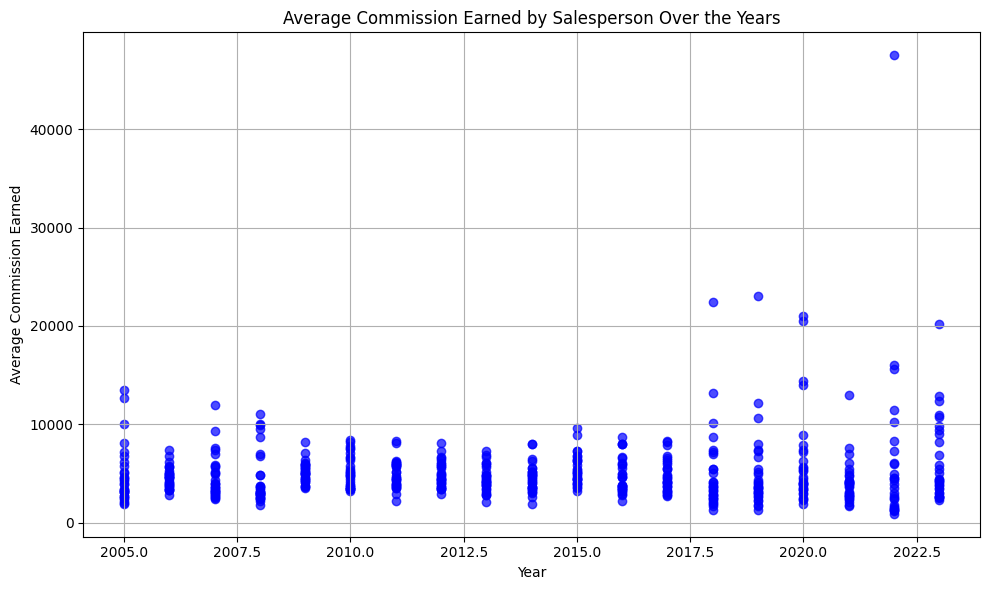

In [ ]:
import matplotlib.pyplot as plt

# Extract data for plotting
years = average_commission_by_salesperson_sorted.select("Year").rdd.flatMap(lambda x: x).collect()
salespeople = average_commission_by_salesperson_sorted.select("Salesperson").rdd.flatMap(lambda x: x).collect()
average_commissions = average_commission_by_salesperson_sorted.select("Average Commission Earned").rdd.flatMap(lambda x: x).collect()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(years, average_commissions, c='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Average Commission Earned')
plt.title('Average Commission Earned by Salesperson Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()
